In [ ]:
from packages import pd
from sales_loader import historical_sales
ruta=r'/home/sebastian/Documentos/programas/Forescast Work/sales_historical.csv'
df_SalesAndProduct= historical_sales(ruta)


In [ ]:
categorias_sbu=df_SalesAndProduct.groupby(['SBU','Country'])['Category Group'].nunique().reset_index()
categorias_sbu.columns = ['SBU', 'Country', 'unique Category Group']
categorias_sbu.to_csv('/home/sebastian/Documentos/programas/Forescast Work/sbu_category.csv')

In [ ]:
categorias_sbu['SBU'].unique()

Se ejecuto correctamenteHistoricalSales
-------------------------------------------------------------------------------

Se ejecuto correctamente: forecast data1
     Country Category Group       Date  Total Sales     Modelo  mae
0  Argentina         Clamps 2019-01-01       4833.0  Historico    0
1  Argentina         Clamps 2019-02-01       1382.0  Historico    0
2  Argentina         Clamps 2019-03-01       9429.0  Historico    0
3  Argentina         Clamps 2019-04-01       2995.0  Historico    0
4  Argentina         Clamps 2019-05-01       3057.0  Historico    0
-------------------------------------------------------------------------------

inicio generate sarimax by category
Se ejecuto correctamente: time_serie
-------------------------------------------------------------------------------

La serie de ventas pasó la prueba de Dickey-Fuller y es estacionaria.
1
la serie es estacionaria
Se ejecuto correctamente: seasonalize_serie
se devuelve la serie original
------------------------

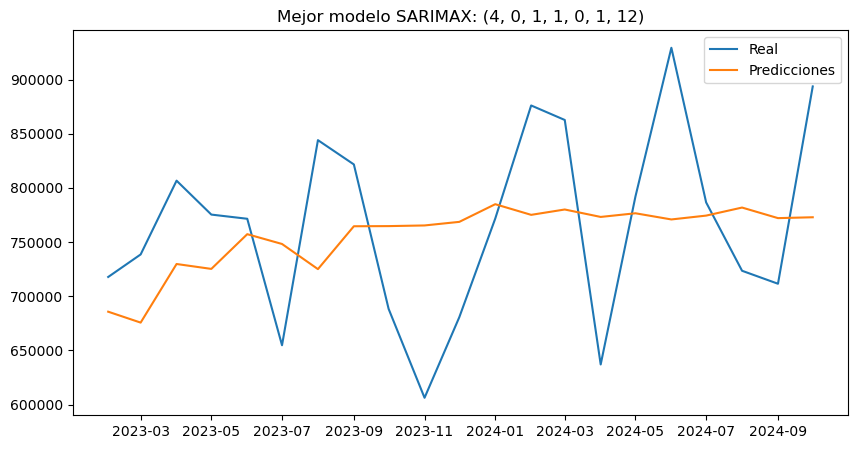

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04141D+01    |proj g|=  6.99358D-01

At iterate    5    f=  1.01233D+01    |proj g|=  6.13899D-01

At iterate   10    f=  1.00933D+01    |proj g|=  3.69128D-02

At iterate   15    f=  1.00907D+01    |proj g|=  1.56970D-02

At iterate   20    f=  1.00884D+01    |proj g|=  6.81222D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     35      1     0     0   2.606D+00   1.007D+01
  F =   10.065536089607752     

CONVERG

 This problem is unconstrained.


AttributeError: 'Series' object has no attribute 'columns'

In [2]:
#============================
#--- Paquetes
#============================
from data_loading import historical_sales
#from series_graphs import graph_line
from sarimax_model import generate_sarimax_by_category
from time_series_analysis import forecast_data

def  generate_models_by_category(df_sales_and_product,filtros):
    '''Recibe informacion de ventas, y filtros de categorias, y evalua para cada categoria un modelo sarimax
    con los mejores parametros
    Arg: df_sales_and_product( dataframe de ventas)
        lst_category:lista de las categorias a las cuales se les realizara pronostico
    Out: dataframe con 12 registros mas correspondientes al pronostico
        columnas( sales, )
    '''
    df_sales_forecast= forecast_data(df_sales_and_product)

    df_sales_forecast=generate_sarimax_by_category(df_sales_and_product,filtros,df_sales_forecast)
    return df_sales_forecast
       
ruta=r'/home/sebastian/Documentos/programas/Forescast Work/sales_historical_prueba.csv'
lst_category=['Pliers','Clamps']
filtros={
#'Brand':[''],
'Country':['Mexico'],
'Category Group':lst_category
}
df_sales_and_product=historical_sales(ruta)
df_sales_forecast=generate_models_by_category(df_sales_and_product,filtros)

In [ ]:
df_sales_forecast.columns

In [ ]:
from time_series_analysis import forecast_data
from data_loading import historical_sales
ruta=r'/home/sebastian/Documentos/programas/Forescast Work/sales_historical_prueba.csv'

df_sales_and_product=historical_sales(ruta)
df_sales_forecast=forecast_data(df_sales_and_product)

In [ ]:
df_sales_forecast.head()